In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('./data/ALL_Assets.csv')

In [12]:
df = df[df['rank'] <= 20]

In [13]:
df.drop(columns=['explorer'], inplace=True)

In [14]:
df.drop(columns=['id', 'symbol', 'maxSupply'], inplace=True)

In [15]:
df.rename(columns={'name': 'Name', 'rank': 'Rank', 'supply': 'Supply', 'marketCapUsd': 'Market Cap', 'volumeUsd24Hr': 'Volume', 'priceUsd': 'Price', 'changePercent24Hr': 'Change'}, inplace=True)

/var/folders/2m/1tt5kymn7md8kjm82w8jjrsh0000gn/T/ipykernel_29899/2168226163.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Volume', y='Name', data=df, palette='viridis')


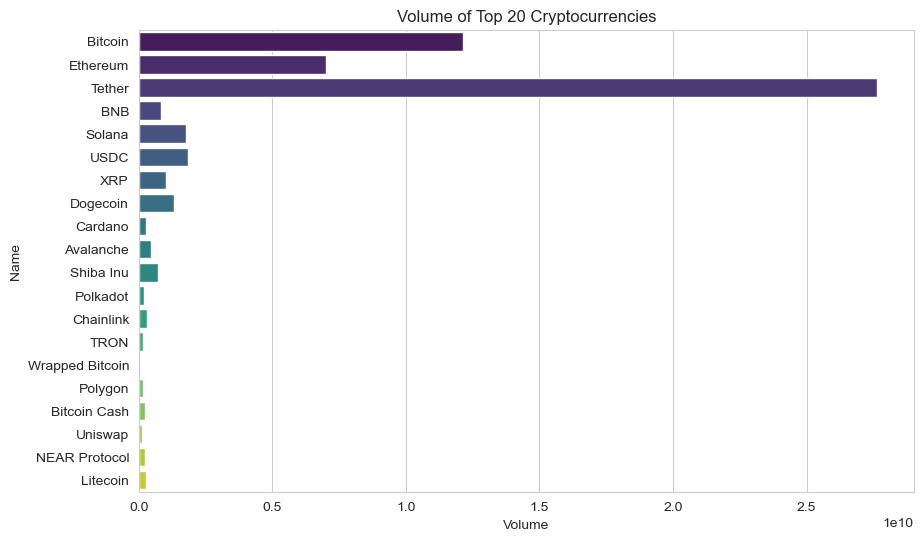

In [27]:
# Volume and price of top 20 cryptocurrencies, order by rank
plt.figure(figsize=(10, 6))
df = df.sort_values('Rank')
sns.barplot(x='Volume', y='Name', data=df, palette='viridis')
plt.xlabel('Volume')
plt.ylabel('Name')
plt.title('Volume of Top 20 Cryptocurrencies')
plt.show()

In [36]:
all = pd.read_csv('./data/bitcoin_price.csv')
all['date'] = pd.to_datetime(all['date'])

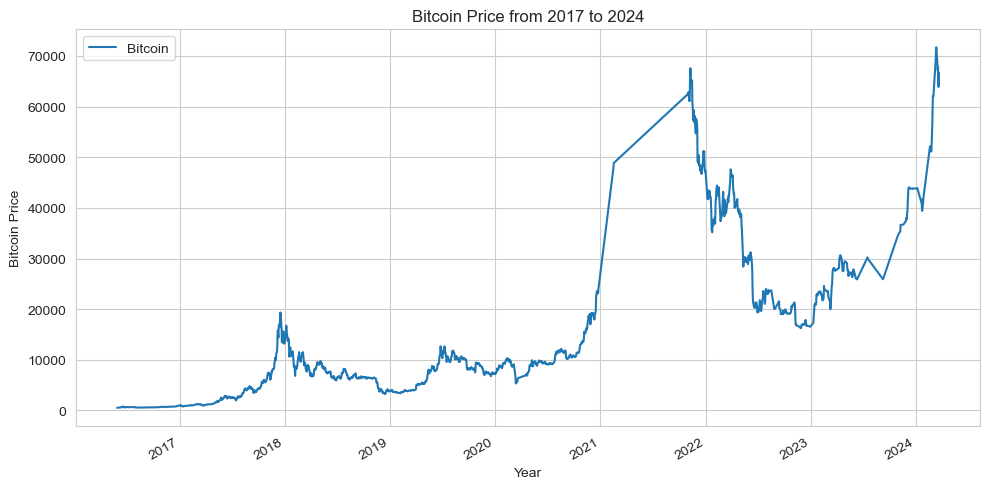

In [39]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
plt.plot(all['date'], all['bitcoin'], label='Bitcoin')

# Set the formatter for the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Optional: Auto-format the x-axis labels to fit them better
plt.gcf().autofmt_xdate()

plt.xlabel('Year')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price from 2017 to 2024')
plt.tight_layout()
plt.legend()
plt.show()

In [40]:
re = pd.read_csv('./data/bitcoin_return.csv')

In [46]:
re['date'] = pd.to_datetime(re['date'])
re = re[re['date'] >= '2017-01-01']
re = re[re['date'] <= '2020-12-31']

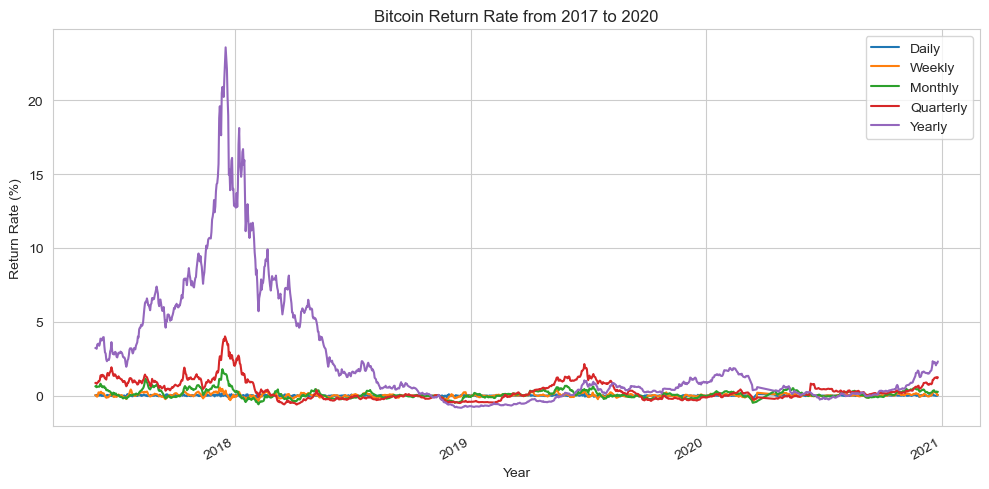

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(re['date'], re['daily_return'], label='Daily')
plt.plot(re['date'], re['return_1w'], label='Weekly')
plt.plot(re['date'], re['return_1m'], label='Monthly')
plt.plot(re['date'], re['return_1q'], label='Quarterly')
plt.plot(re['date'], re['return_1y'], label='Yearly')


# Set the formatter for the x-axis to show only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Optional: Auto-format the x-axis labels to fit them better
plt.gcf().autofmt_xdate()

plt.xlabel('Year')
plt.ylabel('Return Rate (%)')
plt.title('Bitcoin Return Rate from 2017 to 2020')
plt.tight_layout()
plt.legend()
plt.show()